In [1]:
import torch
from evoVAE.models.convoVAE import ConvoVAE
from evoVAE.encoders.minimal_encoder import MinEncoder
from evoVAE.decoders.minimal_decoder import MinDecoder
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from evoVAE.trainer.checkerboard_train import train

model = ConvoVAE(1, 5)
input = torch.randn(1, 1, 28, 28)

test = model(input)
test[0].shape


/Users/sebs_mac/miniconda3/envs/embed/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([1, 1, 28, 28])

In [2]:
thing = model.generate(input).shape
thing

torch.Size([1, 1, 28, 28])

In [5]:
training_data = datasets.FashionMNIST(
    root="data", train=True, download=False, transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data", train=False, download=False, transform=ToTensor()
)

train_loader = torch.utils.data.DataLoader(training_data, batch_size=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=2)

In [6]:
len(train_loader)

30000

IndexError: index 2511 is out of bounds for dimension 0 with size 2

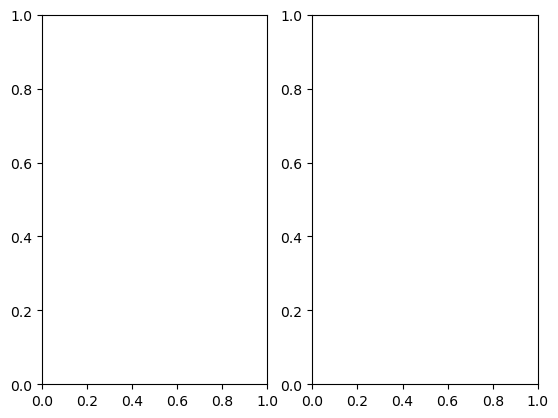

In [4]:
with torch.no_grad():
    for data, _ in train_loader:
       
        sample_idx = torch.randint(len(test_loader), size=(1,)).item()   
        modelOutput = model(data)
        modelOutput

        fig, axs = plt.subplots(1, 2)
        print(data[sample_idx][0].shape)
        axs[0].imshow(data[sample_idx][0], cmap='gray')
        axs[0].set_title("Original")

        test = modelOutput[0][3][0]
        print(test.shape)
        axs[1].imshow(test, cmap='gray')
        axs[1].set_title("Reconstruction")
        
        break 


In [17]:
epochs = 1

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

# speeds up if input size isn't changing 
torch.backends.cudnn.benchmark = True

model.to(device)


optimiser = model.configure_optimiser()
log = ""

for iteration in range(epochs):

    batchSize = len(train_loader)
    epochLoss = 0
    model.train(True)
    
    log += f"Epoch {iteration+1}\n-------------------------------\n"

    for batch in train_loader:

        data, _ = batch
        print("data")
        print(data.shape)
        #data = data.reshape(-1, 28 * 28).to(device)

        # forward step
        modelOutputs = model(data)
        print(modelOutputs[0].shape)

        # calculate loss
        loss, kl, likelihood = model.loss_function(modelOutputs, data)
        epochLoss += loss

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

        if iteration > 100000000:# % print_freq == 0:
            with torch.no_grad():
                itera = f"Iteration {iteration}, ELBO: {loss}, L_rec: {likelihood}, L_reg: {kl}\n"
                #stats = print_progress(time.time() - start, iteration + 1, epochs)
                batchLoss = f"Avg batch loss: {epochLoss/batchSize}\n"

                log += itera
                #log += stats
                log += batchLoss

data
torch.Size([128, 1, 28, 28])
torch.Size([128, 512, 18, 18])
torch.Size([128, 32, 10, 10])
torch.Size([128, 1, 28, 28])
data
torch.Size([128, 1, 28, 28])
torch.Size([128, 512, 18, 18])
torch.Size([128, 32, 10, 10])
torch.Size([128, 1, 28, 28])


KeyboardInterrupt: 

In [ ]:
test[0].shape

torch.Size([1, 1, 28, 28])

In [ ]:
train(model, train_loader, epochs=1)